In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from matplotlib import style
style.use('ggplot')
     
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('netflix daily top 10.csv')
data = data.sort_values(by='Netflix Release Date')
data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,-,The Longest Yard,Movie,NaN,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,NaN,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,-,The Longest Yard,Movie,NaN,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,-,The Longest Yard,Movie,NaN,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,-,The Longest Yard,Movie,NaN,"Apr 1, 2015",4,15


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7100 entries, 1059 to 7031
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Rank                  7100 non-null   int64         
 1   Year to Date Rank     7100 non-null   float64       
 2   Last Week Rank        7100 non-null   float64       
 3   Title                 7100 non-null   object        
 4   Type                  7100 non-null   object        
 5   Netflix Exclusive     7100 non-null   object        
 6   Netflix Release Date  7100 non-null   datetime64[ns]
 7   Days In Top 10        7100 non-null   int64         
 8   Viewership Score      7100 non-null   int64         
 9   Year                  7100 non-null   int32         
 10  Month                 7100 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(3)
memory usage: 610.2+ KB


In [55]:
data.isnull().sum()

Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
Year                    0
dtype: int64

#### Replace Null Values

In [20]:
mode_exc = data['Netflix Exclusive'].dropna().mode()[0]
data['Netflix Exclusive'].replace(np.nan,mode_exc,inplace = True)
data['Netflix Exclusive'].isnull().sum()

0

In [79]:
print(data['Year to Date Rank'].unique())

[ 0.  4. 10.  9.  7.  8.  5.  3.  6.  2.  1.]


#### Replace unidentified value

In [22]:
# data['Last Week Rank'] = pd.to_numeric(data['Last Week Rank'], errors='coerce')
data['Year to Date Rank'].replace('-', 0, inplace=True)
data['Last Week Rank'].replace('-', 0, inplace=True)

#### Convert datatype

In [23]:
data['Year to Date Rank'] = data['Year to Date Rank'].apply(float)            
data['Last Week Rank'] = data['Last Week Rank'].apply(float)
data['Netflix Release Date'] = pd.to_datetime(data['Netflix Release Date'])
data['As of'] = pd.to_datetime(data['As of'])

In [24]:
print("Rank : ",data.Rank.unique())
print("Year to Date Rank : ",data['Year to Date Rank'].unique())

Rank :  [ 6 10  7  9  8  4  5  3  2  1]
Year to Date Rank :  [ 7.  9.  6.  0.  4.  8.  5. 10.  3.  2.  1.]


In [10]:
#data.drop(['Title'], axis=1, inplace=True) 

In [25]:
data.drop(['As of'], axis=1, inplace=True) 

In [26]:
data.head(0)

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score


<Axes: >

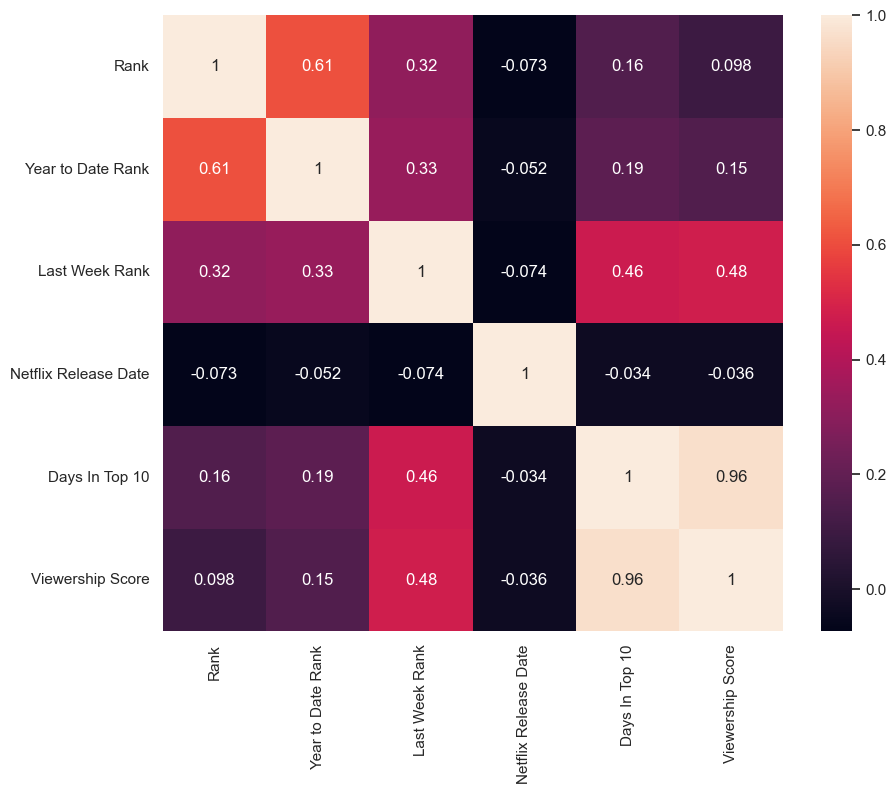

In [61]:
colm = ['Rank' , 'Year to Date Rank' , 'Last Week Rank' , 'Netflix Release Date' , 'Days In Top 10' , 'Viewership Score']
co_dat = data[colm]
plt.figure(figsize=(10, 8))
sns.heatmap(co_dat.corr(), annot = True)

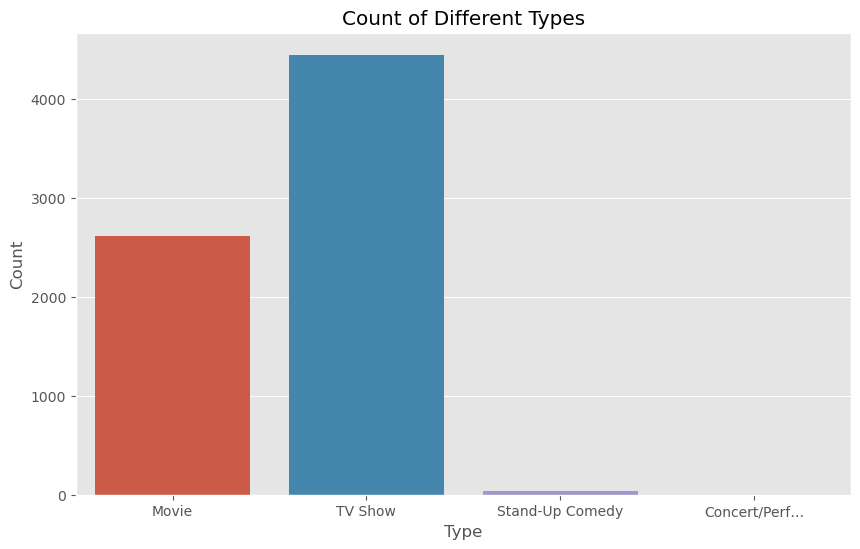

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type')
plt.title('Count of Different Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

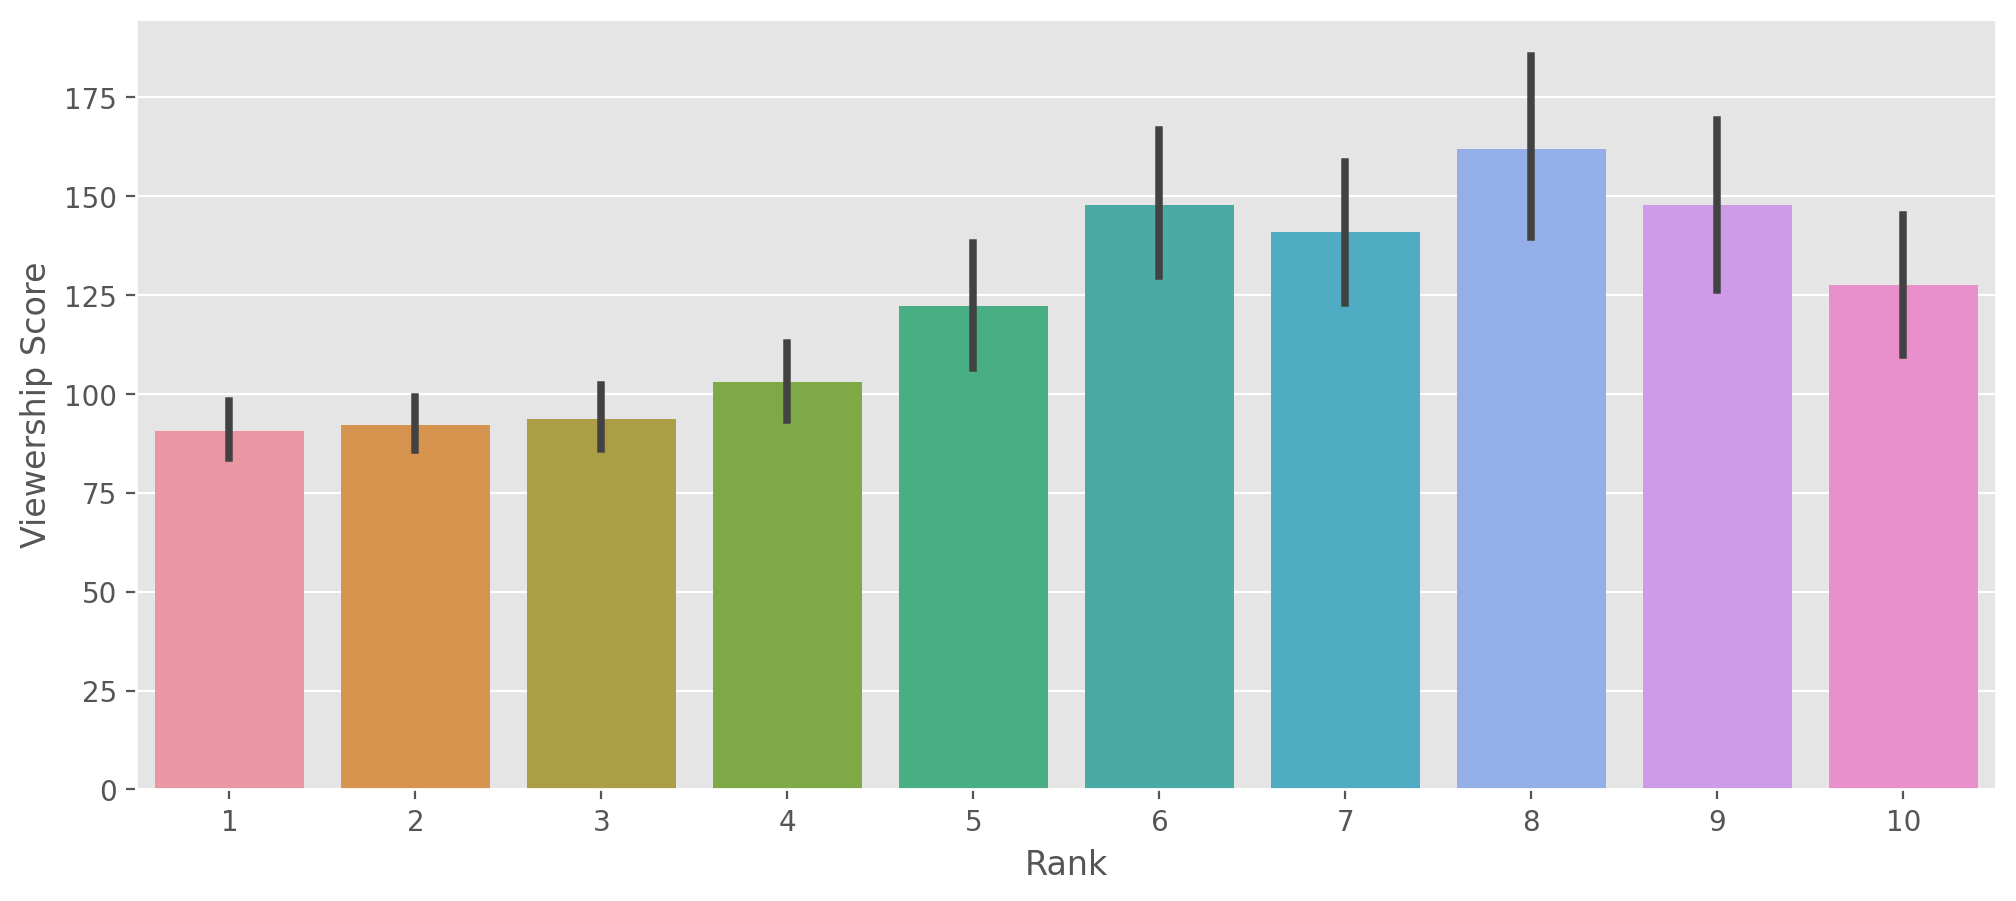

In [29]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(data=data , x = data['Rank'] , y = data['Viewership Score'])
# plt.xticks(rotation = 90)
plt.show()

In [66]:
grp_rnk = data.groupby('Type')['Rank'].value_counts().reset_index(name='Count')
grp_rnk

,Type,Rank,Count
0,Concert/Perf…,5,1
1,Concert/Perf…,2,1
2,Movie,5,283
3,Movie,7,271
4,Movie,4,271
5,Movie,8,270
6,Movie,3,270
7,Movie,10,269
8,Movie,6,266
9,Movie,9,265


<Axes: xlabel='Type', ylabel='count'>

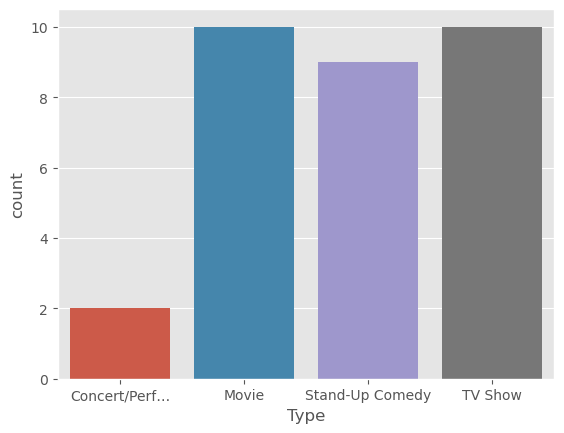

In [33]:
sns.countplot(data = grp_rnk , x = 'Type')

<Axes: xlabel='Type', ylabel='Rank'>

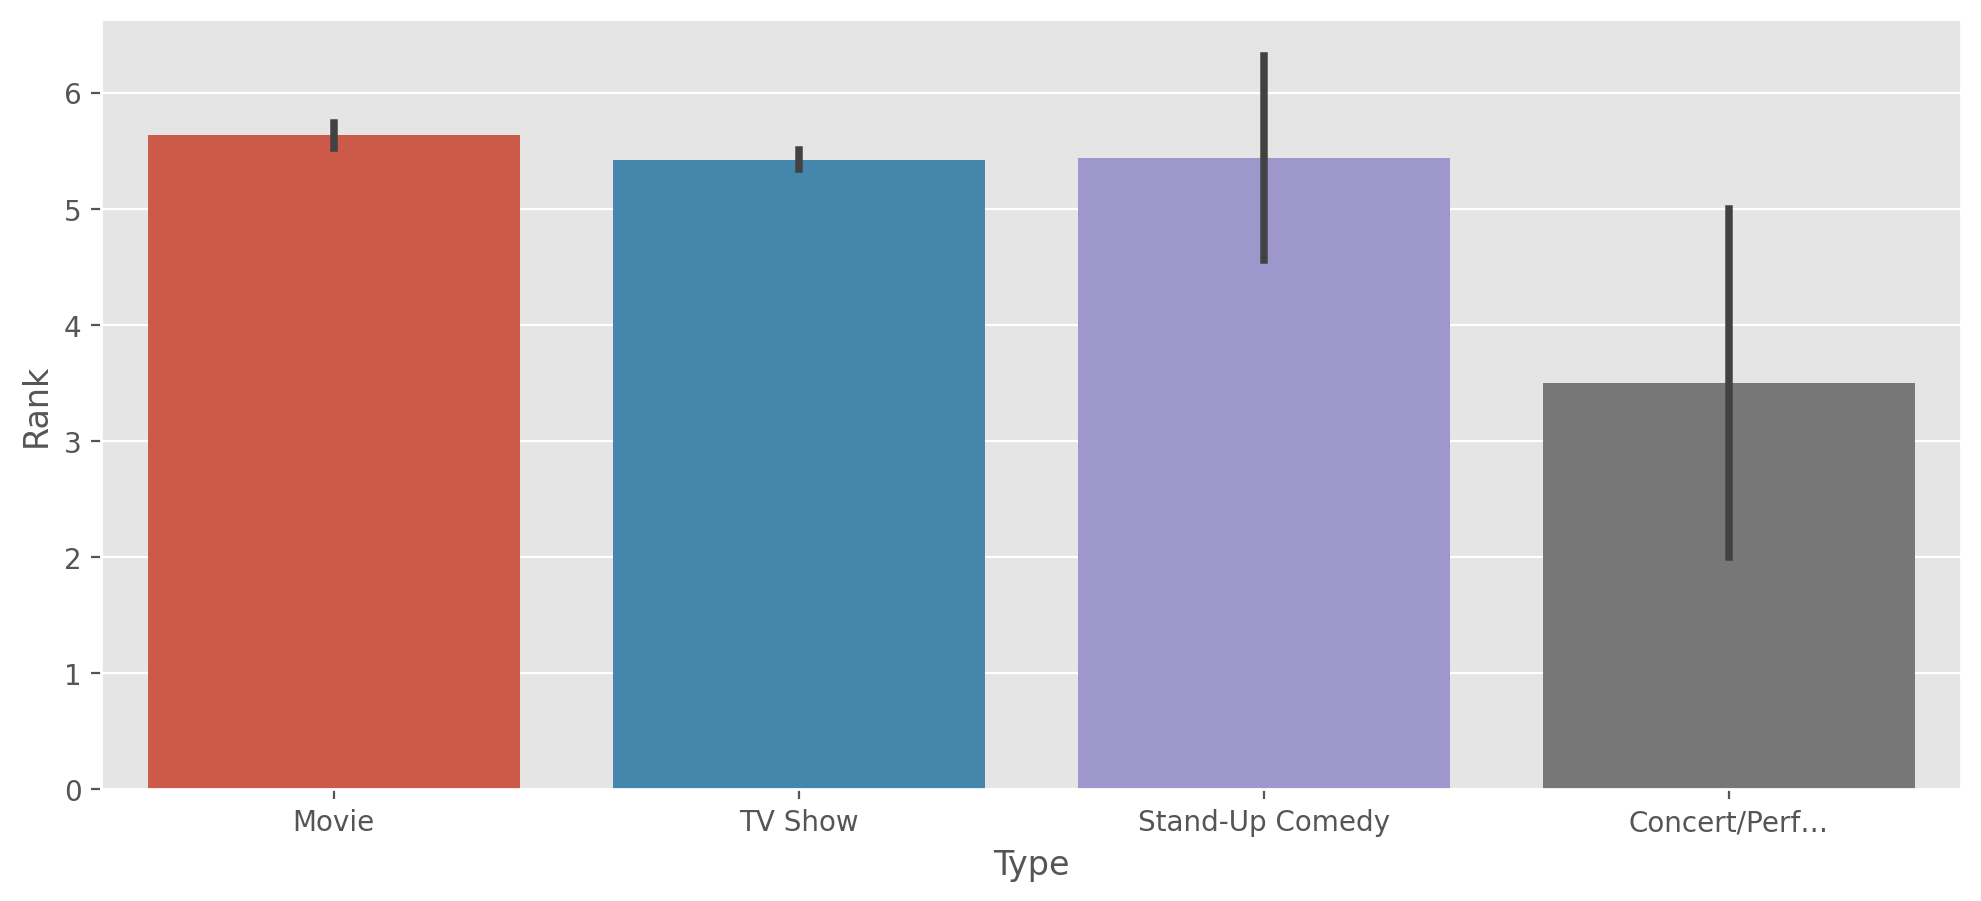

In [34]:
plt.figure(figsize = (12,5),dpi=200)
sns.barplot(data=data , x = data['Type'] , y = data['Rank'])

<Axes: xlabel='Year', ylabel='Viewership Score'>

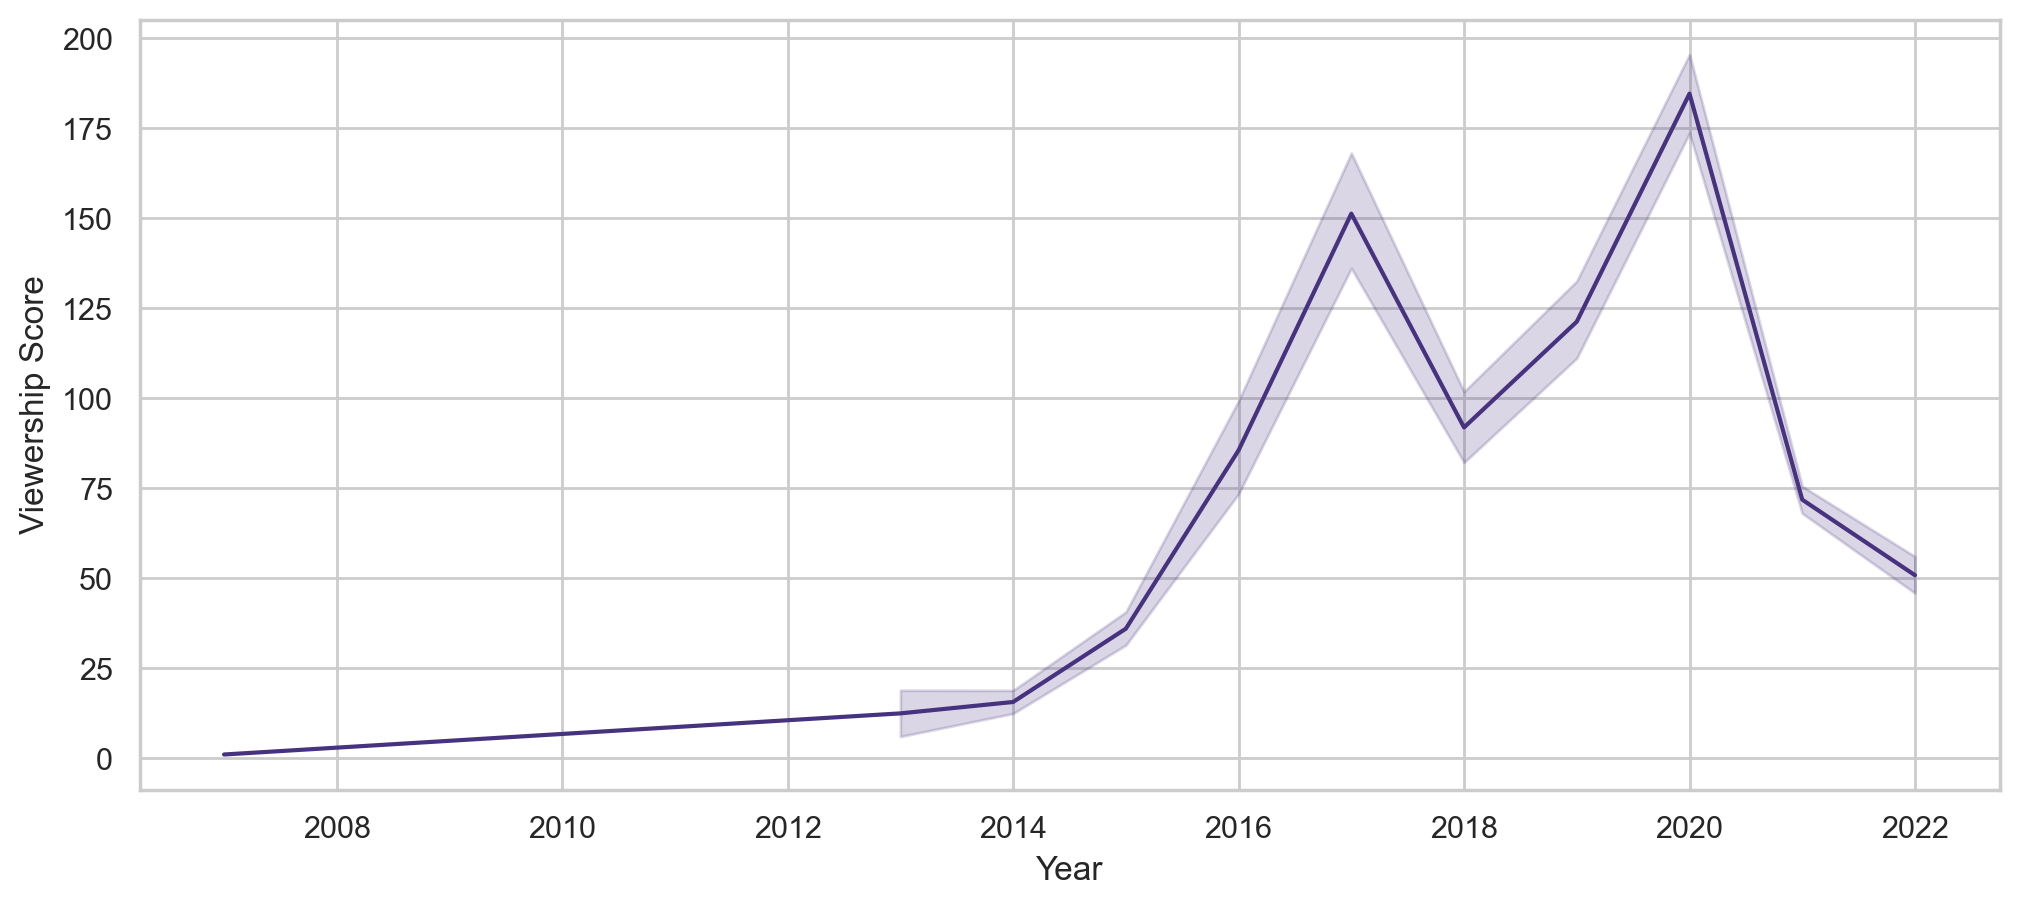

In [49]:
plt.figure(figsize = (12,5), dpi = 200)
data['Netflix Release Date'] = pd.to_datetime(data['Netflix Release Date'])
data['Year'] = data['Netflix Release Date'].dt.year
sns.lineplot(x = data['Year'] ,y = data['Viewership Score'])

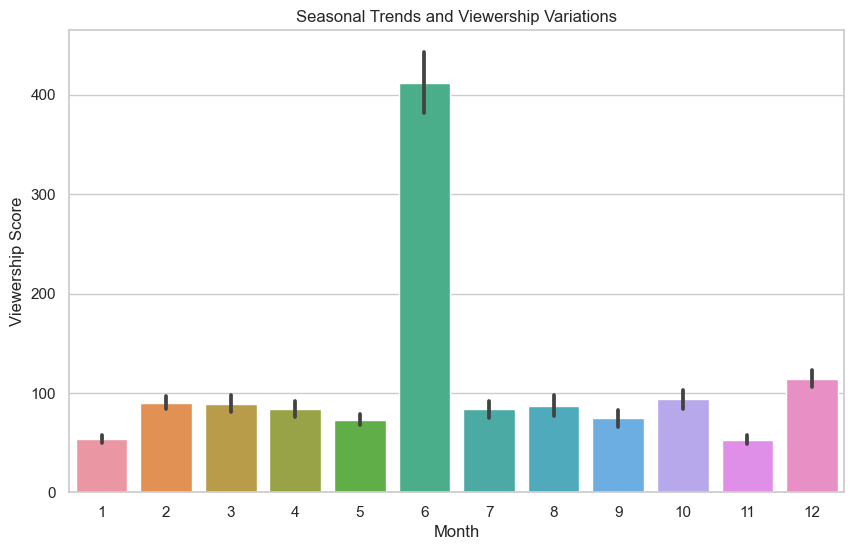

In [77]:
# Extracting month from 'Netflix Release Date' for seasonal analysis
data['Month'] = data['Netflix Release Date'].dt.month

# Seasonal trends analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Month', y='Viewership Score')
plt.title('Seasonal Trends and Viewership Variations')
plt.xlabel('Month')
plt.ylabel('Viewership Score')
plt.show()

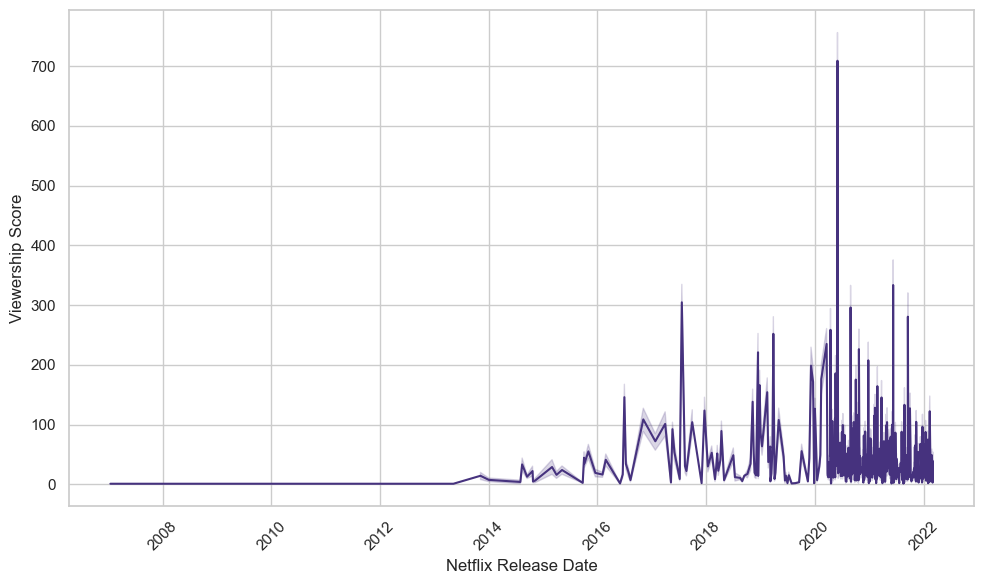

In [38]:
plt.figure(figsize=(10, 6))
data['Netflix Release Date'] = pd.to_datetime(data['Netflix Release Date'])
sns.set(style='whitegrid', palette='viridis')
sns.lineplot(data=data, x='Netflix Release Date', y='Viewership Score')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

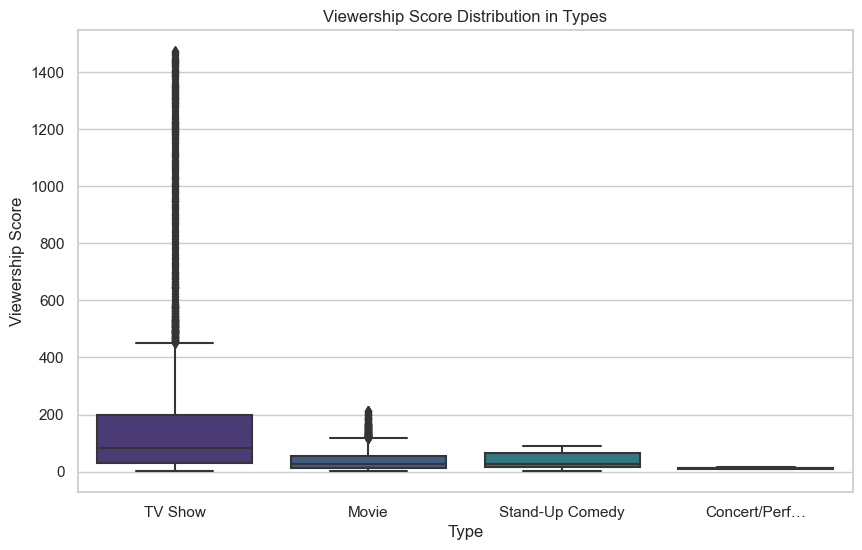

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Type', y='Viewership Score')
plt.title('Viewership Score Distribution in Types')
plt.xlabel('Type')
plt.ylabel('Viewership Score')
plt.show()

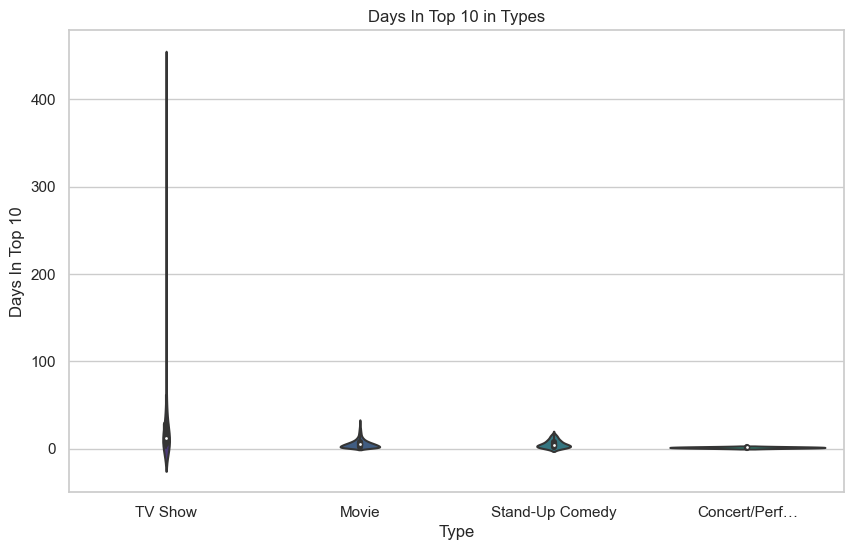

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Type', y='Days In Top 10')
plt.title('Days In Top 10 in Types')
plt.xlabel('Type')
plt.ylabel('Days In Top 10')
plt.show()

In [67]:
data.groupby('Type')['Netflix Exclusive'].value_counts()

Type             Netflix Exclusive
Concert/Perf…    Yes                     2
Movie            Yes                  2611
Stand-Up Comedy  Yes                    41
TV Show          Yes                  4446
Name: count, dtype: int64

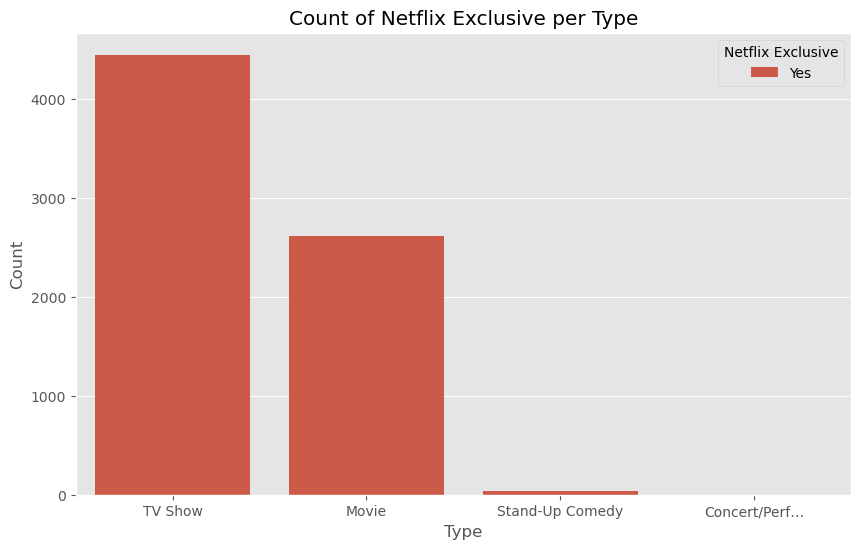

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type', hue='Netflix Exclusive')
plt.title('Count of Netflix Exclusive per Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Netflix Exclusive')
plt.show()

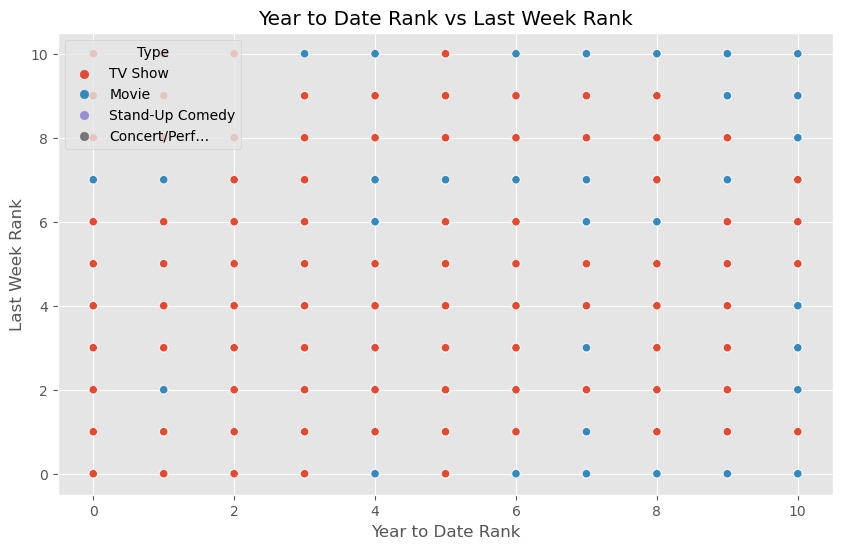

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Year to Date Rank', y='Last Week Rank', hue='Type')
plt.title('Year to Date Rank vs Last Week Rank')
plt.xlabel('Year to Date Rank')
plt.ylabel('Last Week Rank')
plt.legend(title='Type')
plt.show()

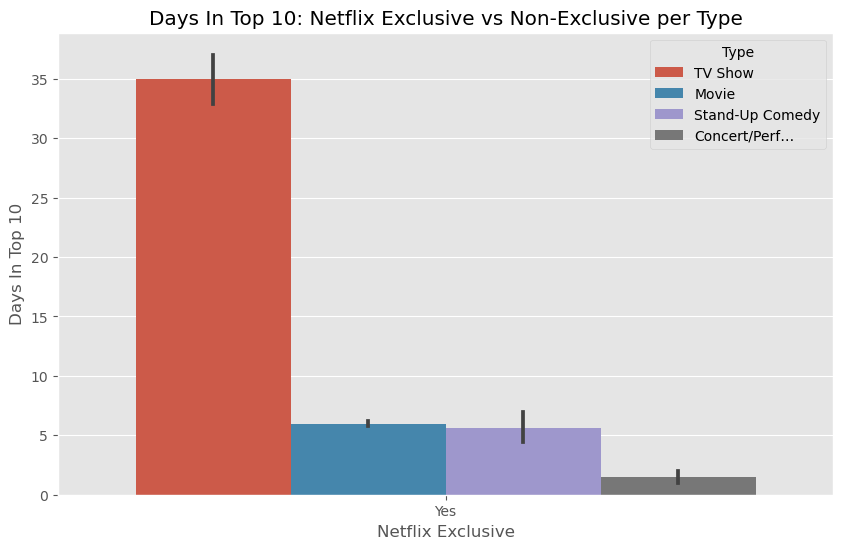

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Netflix Exclusive', y='Days In Top 10', hue='Type')
plt.title('Days In Top 10: Netflix Exclusive vs Non-Exclusive per Type')
plt.xlabel('Netflix Exclusive')
plt.ylabel('Days In Top 10')
plt.legend(title='Type')
plt.show()

['TV Show' 'Movie' 'Stand-Up Comedy' 'Concert/Perf…']


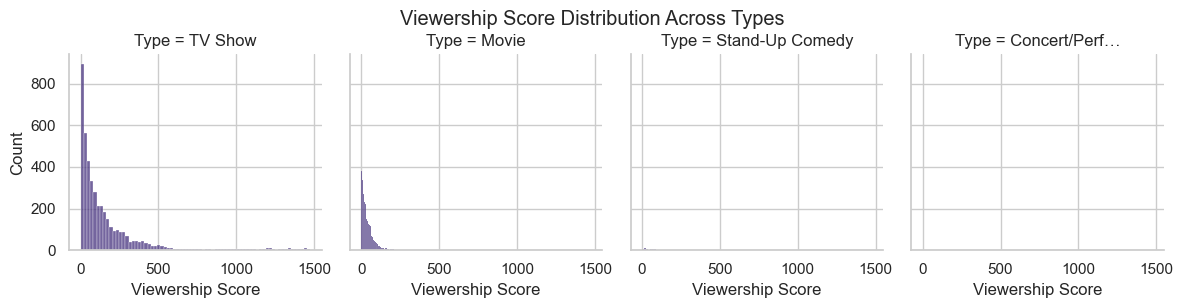

In [81]:
print(data['Type'].unique())
g = sns.FacetGrid(data=data, col='Type', col_wrap=4) 
g.map(sns.histplot, 'Viewership Score')
plt.suptitle('Viewership Score Distribution Across Types', y=1.02)
plt.show()

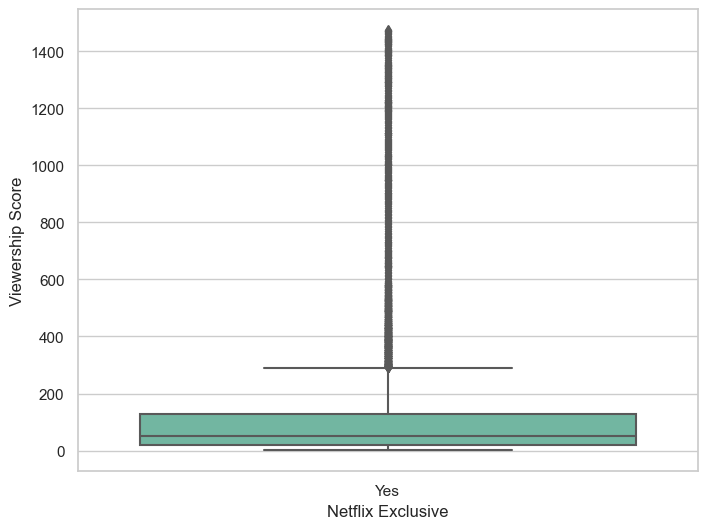

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Netflix Exclusive', y='Viewership Score', palette='Set2')
plt.xlabel('Netflix Exclusive')
plt.ylabel('Viewership Score')
plt.show()

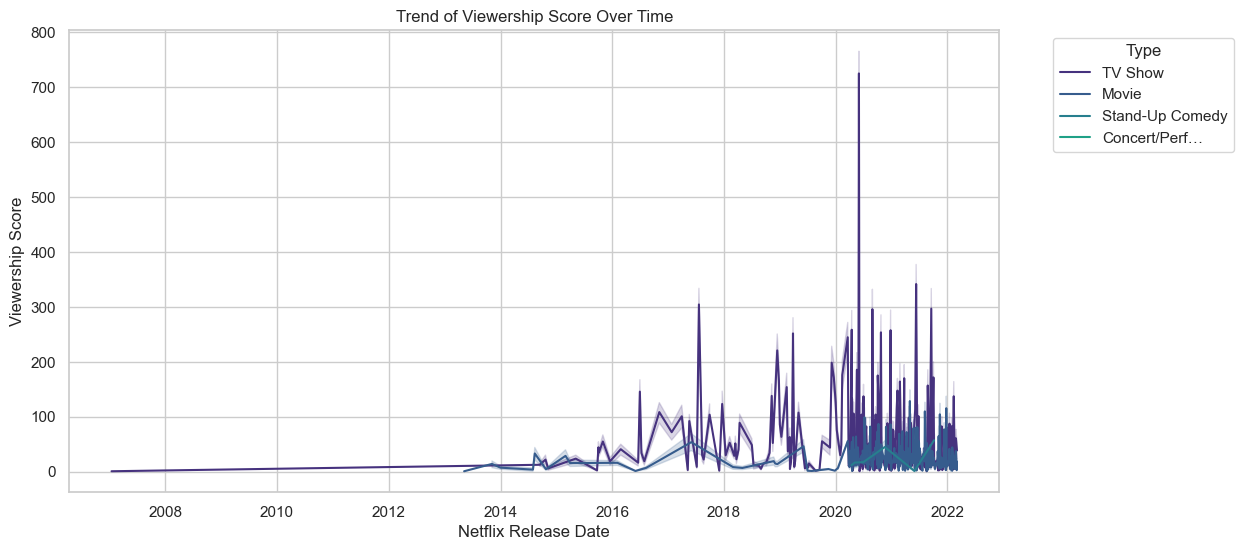

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Netflix Release Date', y='Viewership Score', hue='Type')
plt.title('Trend of Viewership Score Over Time')
plt.xlabel('Netflix Release Date')
plt.ylabel('Viewership Score')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

####  Decision-Making Points

#####  > People's like movie and tv shows

#####  > Concert/Performance has the least Netflix Exclusive

#####  > 8th Rank placed as most number of viewership

#####  > June month has the most number of views

#####  > 2014 netflix started to release more shows and movies and 2022 netflix release many movies